<a href="https://colab.research.google.com/github/smbillah/ist526/blob/main/time_series_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [9]:
# python visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
# from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

import pandas as pd
import numpy as np

# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

# Mount Google Drive

In [32]:
import os

from google.colab import drive
drive.mount('/content/drive')

# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# Ref
https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

#How to Import Time Series in Python?
In read_csv() function, set parse_dates = True, to convert the ‘Date’ column to DateTimeIndex


In [33]:
df_stock = pd.read_csv('data/FB_data.csv', parse_dates=True, index_col = "Date")


# adding Date as column and index
df_stock['Date'] = df_stock.index

df = df_stock

# adding daily interval
df.index = pd.DatetimeIndex(df.index).to_period('D')

# display
display(df_stock.head())
display(df_stock.tail())

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700,2019-06-20
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200,2019-06-21
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000,2019-06-24
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300,2019-06-25
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600,2019-06-26


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2020-06-15,225.089996,233.770004,224.800003,232.500000,232.500000,15340300,2020-06-15
2020-06-16,237.139999,238.460007,233.000000,235.649994,235.649994,15236700,2020-06-16
2020-06-17,235.000000,237.589996,231.729996,235.529999,235.529999,19552800,2020-06-17
2020-06-18,234.990005,236.139999,232.149994,235.940002,235.940002,15782500,2020-06-18
2020-06-19,237.789993,240.830002,235.550003,238.789993,238.789993,30069700,2020-06-19


# Quick Plot

In [ ]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='Open', 
    title='Stock price (Open)'
)

fig.show()

In [ ]:
fig = px.area(
    data_frame = df_stock, 
    x='Date', 
    y='High', 
    title='Stock price (High)'
)

fig.show()

# Plotting all columns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3cf7c04d50>,
      dtype=object)

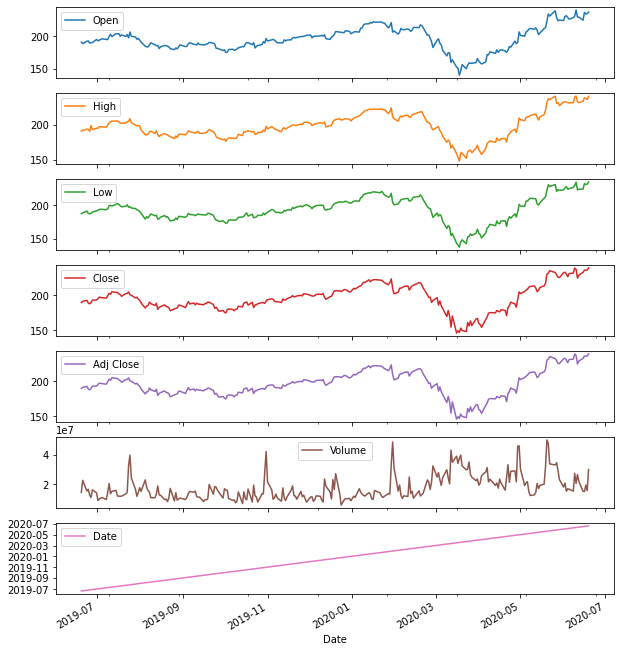

In [ ]:
df.plot(subplots = True, figsize = (10, 12))

# Plotting multiple traces
Previously, plotting multiple traces was difficult. One has to use Plotly's Go library and call add_traces function. Or, they need to melt multiple columns in to one (known as long-format).

But recently, it has been easier in Plotly Express-- one needs to pass a list in 'y'.

More: # https://plotly.com/python/wide-form/

Below, these three approaches are shown one by one

## Approach 1: Easy one (use plotly express)

In [ ]:
# plotting multiple 'y's (in a list)
fig = px.line(
  data_frame = df, 
  x='Date', 
  y=['Open', 'High', 'Low', 'Close', 'Adj Close'],   # note that y is a list
  title='Stock price'
)

fig.show()

## Approach 2: Okay one (use go.Figure and add_traces)

In [ ]:
fig = go.Figure()

# add each trace separately. Use go.Scatter internally
fig.add_trace(go.Scatter(y = df['Open'], name="Open"))
fig.add_trace(go.Scatter(y = df['High'], name="High"))
fig.add_trace(go.Scatter(y = df['Low'], name="Low"))
fig.add_trace(go.Scatter(y = df['Close'], name="Close"))
fig.add_trace(go.Scatter(y = df['Adj Close'], name="Adj Close"))

fig.show()

## Approach 3: Hard one (use dataframe melting and plotly express)

Sometimes it is benefical to stack all columns into one and another column as label. To do that, we use pandas' melt command (below). Note that all 6 columns are not stacked into a single 'Label' column and another one named Value to show their types.

In [ ]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

# remove Volume from this dataset
df_stock_temp = df_stock.drop(['Volume'], axis = 1)

df_stock_melted = pd.melt(
    df_stock_temp, id_vars=['Date'], 
    var_name = 'Label',
    value_vars=['Open', 'High', 'Low', 'Close', 'Adj Close'],    
    value_name = 'Value'
)
df_stock_melted.set_index(['Date'], inplace=True)
df_stock_melted['Date'] = df_stock_melted.index


display(df_stock_melted.head())
display(df_stock_melted.tail())

,Label,Value,Date
Date,,,
2019-06-20,Open,190.949997,2019-06-20
2019-06-21,Open,188.750000,2019-06-21
2019-06-24,Open,192.419998,2019-06-24
2019-06-25,Open,192.880005,2019-06-25
2019-06-26,Open,189.539993,2019-06-26


,Label,Value,Date
Date,,,
2020-06-15,Adj Close,232.500000,2020-06-15
2020-06-16,Adj Close,235.649994,2020-06-16
2020-06-17,Adj Close,235.529999,2020-06-17
2020-06-18,Adj Close,235.940002,2020-06-18
2020-06-19,Adj Close,238.789993,2020-06-19


In [ ]:
# show all lines together
fig = px.line(
    data_frame = df_stock_melted, 
    x='Date', 
    y='Value', 
    color = 'Label',
    title='Stock price'
)

fig.show()

# Data Filter

In [ ]:
fig = px.line(
    data_frame = df_stock, 
    x='Date', 
    y='Open', title='Stock price (Open) with Rangeslider'
)

# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True 
)

# show figure
fig.show()

In [ ]:
fig = px.line( # you can also use 'px.area'
    data_frame = df_stock, 
    x= df_stock.index, # changed from column 'Date' to index Date, 
    y='High', title='Stock price (High) with Rangeslider and RangeSliders'
)

# Add rangeslider
fig.update_xaxes(        
    # add attribute rangeslider_visible (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector)    
    rangeslider_visible = True,

    # next, add rangeselector with rangeselector_buttons (doc: https://plotly.com/python/reference/layout/xaxis/#layout-xaxis-rangeselector-buttons)
    rangeselector_buttons = list(
        # list begin
        [          
         # Each dictionary item below indicates a filter button. Dictionary keys (e.g., count, label, step, stepmode) are described in rangeselector_buttons's documnetation
          dict(count = 3,  label = "1Q", step = "month", stepmode = "backward"), # button 1
          dict(count = 4,  label = "2Q", step = "month", stepmode = "backward"), # button 2
          dict(count = 8,  label = "3Q", step = "month", stepmode = "backward"), # button 3
          dict(count = 12, label = "4Q", step = "month", stepmode = "backward"), # button 4
          dict(step="all")                                                       # button 5
        ] 
        # list end    
    )
)

# show figure
fig.show()

# Data Animation

In [ ]:
df_country = px.data.gapminder()

display(df_country.head())
display(df_country.tail())

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298,ZWE,716


In [ ]:
# note that animation_group should exist in all frames
fig = px.scatter(
    data_frame = df_country, 
    x="gdpPercap",         # gdp per capita
    y="lifeExp",           # life expectancy  
    size="pop",            # population
    color="continent",     # group/label
    hover_name="country",
    log_x=True, 
    size_max=55, 
    range_x=[100,100000], 
    range_y=[25,90],
    title= "GDP Per Captia vs Life Expectancy of Countries", 
    
    # animation control
    animation_frame="year", 
    animation_group="country",
)

fig.show()

In [ ]:
# Watch as bars chart population changes
fig = px.bar(
    data_frame = df_country, 
    x="continent",        # continent
    y="pop",              # population    
    color="continent",    # group/label
     
    range_y=[0, 8000000000],
    title= "Population of Countries", 
    
    # animation control
    animation_frame="year", 
    animation_group="country",
)

fig.show()

# Adding facets

In [ ]:
# adding facet
fig = px.scatter(
    data_frame = df_country, 
    x="gdpPercap",         # gdp per capita
    y="lifeExp",           # life expectancy  
    size="pop",            # population
    color="continent",     # group/label
    hover_name="country",
    log_x=True, 
    size_max=55, 
    range_x=[100,100000], 
    range_y=[25,90],
    title= "GDP Per Captia vs Life Expectancy of Countries", 
    
    # animation control
    animation_frame="year", 
    animation_group="country",

    # This is new #
    facet_col="continent" # new attribute facet 
)

fig.show()

# Slicing, filtering Data

In [ ]:
# showing data only for 2019
df_subset =  df['2019']
display(df_subset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-06-20,190.949997,191.160004,187.639999,189.529999,189.529999,14635700,2019-06-20
2019-06-21,188.750000,192.000000,188.750000,191.139999,191.139999,22751200,2019-06-21
2019-06-24,192.419998,193.979996,191.570007,192.600006,192.600006,15509000,2019-06-24
2019-06-25,192.880005,193.139999,188.130005,188.839996,188.839996,16750300,2019-06-25
2019-06-26,189.539993,190.759995,187.309998,187.660004,187.660004,12808600,2019-06-26
...,...,...,...,...,...,...,...
2019-12-24,206.300003,206.789993,205.000000,205.119995,205.119995,6046300,2019-12-24
2019-12-26,205.570007,207.820007,205.309998,207.789993,207.789993,9350700,2019-12-26
2019-12-27,208.669998,208.929993,206.589996,208.100006,208.100006,10284200,2019-12-27


In [ ]:
# showing data only for August, 2019
df_subset =  df['2019-08']
display(df_subset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-08-01,194.169998,198.470001,190.880005,192.729996,192.729996,17777000,2019-08-01
2019-08-02,191.100006,192.619995,188.070007,189.020004,189.020004,15297000,2019-08-02
2019-08-05,184.690002,185.669998,179.339996,181.729996,181.729996,23086700,2019-08-05
2019-08-06,183.690002,185.789993,183.089996,184.509995,184.509995,18035700,2019-08-06
2019-08-07,183.600006,186.369995,181.220001,185.149994,185.149994,15833200,2019-08-07
2019-08-08,186.619995,190.339996,184.050003,190.160004,190.160004,14828900,2019-08-08
2019-08-09,190.000000,190.979996,187.119995,187.850006,187.850006,11058800,2019-08-09
2019-08-12,186.850006,187.589996,184.460007,185.369995,185.369995,10936300,2019-08-12
2019-08-13,185.520004,191.380005,185.369995,188.449997,188.449997,13577000,2019-08-13


In [ ]:
# showing data from August 1st to 15th, 2019
df_subset =  df['2019-08-01': '2019-08-15']
display(df_subset)

,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
2019-08-01,194.169998,198.470001,190.880005,192.729996,192.729996,17777000,2019-08-01
2019-08-02,191.100006,192.619995,188.070007,189.020004,189.020004,15297000,2019-08-02
2019-08-05,184.690002,185.669998,179.339996,181.729996,181.729996,23086700,2019-08-05
2019-08-06,183.690002,185.789993,183.089996,184.509995,184.509995,18035700,2019-08-06
2019-08-07,183.600006,186.369995,181.220001,185.149994,185.149994,15833200,2019-08-07
2019-08-08,186.619995,190.339996,184.050003,190.160004,190.160004,14828900,2019-08-08
2019-08-09,190.000000,190.979996,187.119995,187.850006,187.850006,11058800,2019-08-09
2019-08-12,186.850006,187.589996,184.460007,185.369995,185.369995,10936300,2019-08-12
2019-08-13,185.520004,191.380005,185.369995,188.449997,188.449997,13577000,2019-08-13


In [ ]:
fig = px.line(
  data_frame = df_subset, 
  # x='Date', 
  y='Open', title='subset'
)

fig.show()

## Missing value

In [ ]:
# replace missing values with columns' means
df_subset = df_subset.fillna(df_subset.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



# Time Series Analysis

## Moving Average (Smoothing or trend)

Trend: is there any consistent upward or downward pattern?

### Approach 1: Manaully calculating moving averages
More info: https://www.geeksforgeeks.org/python-pandas-dataframe-rolling/

In [ ]:
# window size or lag = 5
window_size = 10
df_rolling = df['Open'].rolling(window = window_size).mean()
display(df_rolling.head())

Date
2019-06-20   NaN
2019-06-21   NaN
2019-06-24   NaN
2019-06-25   NaN
2019-06-26   NaN
Name: Open, dtype: float64

In [ ]:
# replace missing values
df_rolling = df_rolling.fillna(df_rolling.mean())
display(df_rolling.head())

Date
2019-06-20    195.151705
2019-06-21    195.151705
2019-06-24    195.151705
2019-06-25    195.151705
2019-06-26    195.151705
Name: Open, dtype: float64

In [ ]:
## visualize the orginal and sliding window 

fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_rolling, name="moving average"))
fig.add_trace(go.Scatter(x = df['Date'],y = df['Open'], name="original"))    

fig.show()

### Approach 2: Use library function in Plotly
Note that this is not exactly the same as Approach 1. 

Ref: https://plotly.com/python/linear-fits/ 

In [ ]:
fig = px.scatter(
  data_frame = df['Open'], 
  y='Open', trendline="rolling", 
  trendline_options=dict(window=window_size), 
  title='5-point moving average Stock price (Open)'
)
fig.show()

### Approach 3: Hybrid (use Plotly express + Go)

This approach is ugly and not recommended. Only use it if absolutely necessary.

In [ ]:
# create to plotly express figures

## first
fig_px = px.scatter(
  data_frame = df['Open'], 
  y='Open', trendline="rolling", 
  trendline_options=dict(window=window_size), 
  title='5-point moving average Stock price (Open)'
)
## add color
fig_px.update_traces(line=dict(color = 'rgba(50,50,50,0.2)'))

## second
fig_px1 = px.line(
  data_frame = df['Open'], 
  y='Open', 
  title='Stock price (Open)'
) 

## combine them with go.Figure (note that the 'data' attribute is extracted and combined)
fig = go.Figure(data = fig_px.data + fig_px1.data)

fig.show()

## Autocorrelation and Partial Autocorrelation
A correlation between a time series and its delayed version.
Useful in finding patterns

### Auto-correlation (ACF)

An auto-autocorrelation (ACF) is the summary of the correlation between a data point at t ($D_t$) and all the data points at prior (lagged) time steps (e.g., $D_{t-1}$, $D_{t-2}$, $D_{t-3}$ $\dots$ $D_{t-p}$).

It accounts for both the direct and indirect relationship between $D_t$ and $D_{t-p}$.

#### Create a lagged dataset by 1. This model is commonly known as AR(1).

In [ ]:
# create a lagged dataset by 1
nlag = 1

# take the original data
display(df['Open'].head(5))

df_lagged = df['Open'].shift(nlag)

# manually check the difference
display(df_lagged.head(5))

Date
2019-06-20    190.949997
2019-06-21    188.750000
2019-06-24    192.419998
2019-06-25    192.880005
2019-06-26    189.539993
Name: Open, dtype: float64

Date
2019-06-20           NaN
2019-06-21    190.949997
2019-06-24    188.750000
2019-06-25    192.419998
2019-06-26    192.880005
Name: Open, dtype: float64

#### Visualize two data to see any correlation

In [ ]:
# visualize to see any correlation
fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_lagged, name="lagged"))
fig.add_trace(go.Scatter(x = df['Date'], y = df['Open'], name="original"))    

fig.show()

#### Draw a correlation line using plotly express
Ref: https://stackoverflow.com/questions/66146489/plotly-how-to-retrieve-regression-results-using-plotly-express

Note that this regression line won't work if nlag is greather than 1.
This is because the regression needs to find a relationship between point at t to points at t-1, t-2, ..., t-nlag, which the default OLS cannot fit. Here, an OLS trendline only fits the relationship between points at t and t-1.

In [ ]:
import math

# run actual correlation line using plotly express
fig = px.scatter(x=df_lagged.values, y=df['Open'].values, trendline="ols")
fig.show()

# retrieve model estimates
model = px.get_trendline_results(fig)
results = model.iloc[0]["px_fit_results"]
#dir(results)
alpha = results.params[0]
beta = results.params[1]
p_beta = results.pvalues[1]
r_squared = results.rsquared
r_rsquared_adj = results.rsquared_adj
#r_resid_pearson = results.resid_pearson
pearson_coeff = math.sqrt(r_squared)

display(pearson_coeff)

0.9733801010296923

It seems like a strong correlation.

#### Use a library to find correlation

Y-axis shows the correlation (+1 to -1). 
X-axis shows the lag amount.
The blue shaded region shows the error margin

To learn more: https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

In [ ]:
from statsmodels.graphics import tsaplots # time series plots
from statsmodels.tsa.stattools import  acf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



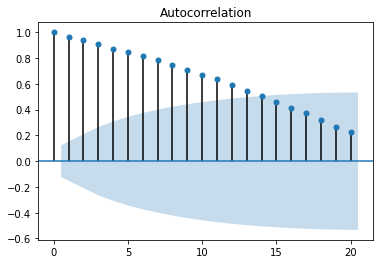

[1.         0.96362803 0.93613942 0.90580104 0.87160987 0.84406933
 0.81361114 0.78193596 0.74366141 0.70728267 0.67038575 0.63425582
 0.59241991 0.54795185 0.50240624 0.45912689 0.41371451 0.37077193
 0.32059515 0.26854214 0.22277083]


In [ ]:
nlag = 20
result = acf(x=df['Open'],  nlags = nlag)

fig = tsaplots.plot_acf(df['Open'], lags = nlag)
plt.show()
print(result)

Here, the lag 0 means the data iteself, which, of course, has the highest correlation (with itself). 

The correlation with Lag 1 is 0.96, which closely matches with our previous calculation (0.97). 

After lag 12, the correlation fell sharply.

Hence, q = 12 could a reasonal estimate for ARIMA model.

More intuition: https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling


### Partial Auto-Correlation (PACF)

A partial autocorrelation (PACF) is the summary of the correlation between a data point at t ($D_t$) and the data points at prior time steps (e.g., $D_{t-p}$) with the intervening observations removed.

It is called `partial` because the correlation between $D_t$ and $D_{t-p}$ can depend on the intermediate data points, but PACF simply ignores them.

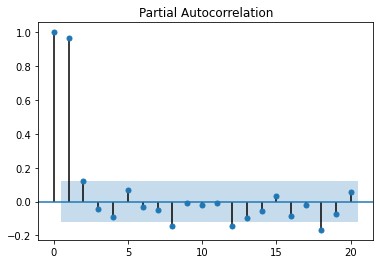

[ 1.          0.96745195  0.11923517 -0.04311809 -0.08979859  0.07107363
 -0.03394578 -0.05190971 -0.1465485  -0.00841333 -0.01970134 -0.00647778
 -0.14566817 -0.09594423 -0.05690572  0.03055454 -0.08444773 -0.01878
 -0.16745842 -0.07593855  0.05408703]


In [ ]:
from statsmodels.tsa.stattools import  pacf

result = pacf(x=df['Open'],  nlags = nlag)

fig = tsaplots.plot_pacf(df['Open'], lags = nlag)
plt.show()
print(result)

The correlation fell sharply after lag 1. Since there are no dominant correlation at different lags, the data is unlikely to have seasonal an component.

Hence, p = 1 could a reasonal estimate for ARIMA model.

More intuition: https://www.baeldung.com/cs/acf-pacf-plots-arma-modeling

## Seasonality
Seasionality: is there any clear pattern?
We can visualize data for each year

### Manually

In [ ]:
display(df.index.year)
display(df.index.month)

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Date', length=253)

Int64Index([6, 6, 6, 6, 6, 6, 6, 7, 7, 7,
            ...
            6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
           dtype='int64', name='Date', length=253)

In [ ]:
# break down by year
df_2019 = df['2019']
df_2020 = df['2020']

# visualize
fig = go.Figure()
fig.add_trace(go.Scatter(y = df_2019['Open']))
fig.add_trace(go.Scatter(y = df_2020['Open']))

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.



Is there any common patter? If not, let's break it down by month

In [ ]:
# break down by month
df_aug = df['2019-08']
df_sep = df['2019-09']
df_oct = df['2019-10']
df_nov = df['2019-11']

# visualize
fig = go.Figure()
fig.add_trace(go.Scatter(y = df_aug['Open']))
fig.add_trace(go.Scatter(y = df_sep['Open']))
fig.add_trace(go.Scatter(y = df_oct['Open']))
fig.add_trace(go.Scatter(y = df_nov['Open']))

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

Indexing a DataFrame with a datetimelike index using a single string to slice the r

In [ ]:
# create data by month

# group by month
index_month = df.index.month
df_by_month = df.groupby(index_month).mean()
display(df_by_month)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1,216.252382,218.119524,214.417143,216.643333,216.643333,1.653879e+07
2,207.037896,209.679475,204.963157,207.505263,207.505263,1.671242e+07
3,165.283182,170.172727,160.389092,165.747727,165.747727,2.952126e+07
4,177.120951,179.785715,173.592857,177.003335,177.003335,2.578487e+07
5,215.763500,219.477501,213.236501,216.549001,216.549001,2.547861e+07
6,218.647273,221.730001,215.840910,219.197272,219.197272,1.848726e+07
7,199.314090,201.507729,197.158183,199.595454,199.595454,1.595739e+07
8,184.994545,186.795908,182.606819,184.497726,184.497726,1.339522e+07
9,186.283500,187.609500,183.889000,185.735001,185.735001,1.322692e+07


### Using a library

Seasonal decomposition using moving averages
Refs: https://www.statsmodels.org/dev/tsa.html#
and https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html#statsmodels.tsa.seasonal.seasonal_decompose

In [ ]:
import statsmodels.api as sm

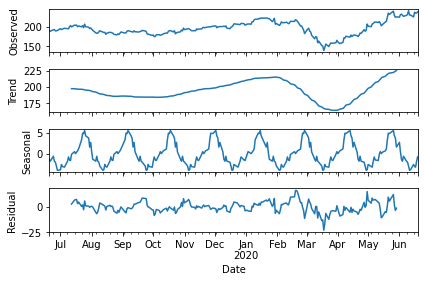

In [ ]:
## freq = how many times the data will be divided

## note that freq = 1 will do nothing
my_freq = 30

decomposition = sm.tsa.seasonal_decompose(x = df['Open'], freq=my_freq, model = 'Additive')
# decomposition = sm.tsa.seasonal_decompose(x = df['Open'], freq=my_freq, model = 'Multiplicative')
fig = decomposition.plot()


plt.show()

Here, 
* `observed` is the data series that has been decomposed.
* `seasonal` is the seasonal component of the data series.
* `trend` is the trend component of the data series.
* `resid` is the residual component of the data series.
* `weights` (optional) is the weights used to reduce outlier influence.


In [ ]:
display(dir(decomposition))

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'nobs',
 'observed',
 'plot',
 'resid',
 'seasonal',
 'trend']

In [ ]:
display(decomposition.seasonal)

Date
2019-06-20   -1.354673
2019-06-21   -1.827982
2019-06-24   -0.640008
2019-06-25   -1.832294
2019-06-26   -2.070601
                ...   
2020-06-15   -2.621079
2020-06-16   -3.126198
2020-06-17   -3.273698
2020-06-18   -1.866983
2020-06-19   -0.805342
Freq: D, Name: Open, Length: 253, dtype: float64

Note that the seasonal values bounce between +2 to -2 and appear like a random noise. So, the data has unlikely to have any sessional property.

## Differential Property

We need to check if the data is stationnary (e.g., mean trend is constant) or not.



### Manual approach

In [54]:
# create a first degree diffentiation dataset

df_diff = df['Open'] -  df['Open'].shift(1)
display(df_diff)

Date
2019-06-20          NaN
2019-06-21    -2.199997
2019-06-24     3.669998
2019-06-25     0.460007
2019-06-26    -3.340012
                ...    
2020-06-15    -4.809998
2020-06-16    12.050003
2020-06-17    -2.139999
2020-06-18    -0.009995
2020-06-19     2.799988
Freq: D, Name: Open, Length: 253, dtype: float64

In [55]:
# plot it
fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Date'], y = df_diff, name="first-degree diff"))
fig.add_trace(go.Scatter(x = df['Date'], y = df['Open'], name="original"))    

fig.show()

From this graph, the blue line (e.g., first-degree diff) makes the mean almost constant (close to 0). So, no subsequent difference is necessary.

It also means we can use `d=1` for ARIMA model

### Use a library

In [56]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Open'])
print('p-value: %f' % result[1])

df_diff.dropna(inplace=True)
result = adfuller(df_diff)
print('p-value: %f' % result[1])



p-value: 0.810742
p-value: 0.000000


Here, first result (p-value = .81 > 0.5) indicates that df['Open'] is not stationary. 

The second result (p-value = .00 < 0.5) indicates that df_diff is stationary. So, after taking the difference by once makes the data stationary.

Therefore, it validates our earlier speculation that `d=1` should be used to model ARIMA.

# ARIMA model

The ARIMA(p,d,q) model requires three parameters and is traditionally configured manually.

https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [60]:
# fit model
from statsmodels.tsa.arima_model import ARIMA

#order: (p,d,q) -->  (autoregressive, differences, and moving average) components
# d is always an integer, while p and q may either be integers or lists of integers.
q = 12 #12
p = 1
d = 1
model = ARIMA(df['Open'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

ValueError: ignored

It throws an error, telling that the data is not stationary. Let's make it stationary manually by taking the differentiation

In [63]:
# taking the first order differentiation
df_stationary = df['Open'] - df['Open'].shift(1)

q = 12
p = 1
d = 0 # not 1 anymore

model = ARIMA(df['Open'], order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                   Open   No. Observations:                  253
Model:                    ARMA(1, 12)   Log Likelihood                -724.920
Method:                       css-mle   S.D. of innovations              4.218
Date:                Mon, 28 Mar 2022   AIC                           1479.840
Time:                        17:34:32   BIC                           1532.840
Sample:                    06-20-2019   HQIC                          1501.164
                         - 06-19-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         199.5267      9.549     20.895      0.000     180.811     218.243
ar.L1.Open      0.9669      0.019     49.669      0.000       0.929       1.005
ma.L1.Open     -0.1404      0.066     -2.139    

## Forecast

In [64]:
# forecast some data points
n_forecast = 10

yhat = model_fit.forecast(steps = n_forecast)
# print('Predicted: %.3f' % yhat)
# print(yhat[0])

In [65]:
# check the last few data points
display(df['Open'].tail(5))

Date
2020-06-15    225.089996
2020-06-16    237.139999
2020-06-17    235.000000
2020-06-18    234.990005
2020-06-19    237.789993
Freq: D, Name: Open, dtype: float64

In [69]:
# create a new data frame with forecasted data 
df_forecast = pd.DataFrame({'Date': pd.date_range(start='2020-06-20', periods=n_forecast, freq='D'), 'Open':yhat[0]})
display(df_forecast)

,Date,Open
0,2020-06-20,234.889343
1,2020-06-21,233.969141
2,2020-06-22,233.832939
3,2020-06-23,234.416446
4,2020-06-24,233.161288
5,2020-06-25,231.833149
6,2020-06-26,231.066735
7,2020-06-27,231.642366
8,2020-06-28,231.195712
9,2020-06-29,230.147631


In [70]:
# plot it
fig = go.Figure()

fig.add_trace(go.Scatter(x = df_forecast['Date'], y = df_forecast['Open'], mode='lines+markers', name="forecasted"))
fig.add_trace(go.Scatter(x = df['Date'], y = df['Open'], mode='lines+markers', name="original"))    

fig.show()

Does the output (blue line or points) make sense? If not, the we need to tune the parameters 

# Simulate Time Series Data

In [29]:
from numpy.random import default_rng
rng = default_rng(12345)
# print(rng)

# vals = rng.standard_normal(10)
mean = 0,
std = 10
n_points = 200
drift_factor = 15

# simulate dummy data
X_t = rng.normal(mean, std, n_points) + drift_factor
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza simulated data
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(            
  rangeslider_visible = True 
)
fig.show()

,Date,X
2020-06-20,2020-06-20,0.761750
2020-06-21,2020-06-21,27.637285
2020-06-22,2020-06-22,6.293383
2020-06-23,2020-06-23,12.408268
2020-06-24,2020-06-24,14.246567
...,...,...
2021-01-01,2021-01-01,21.861825
2021-01-02,2021-01-02,27.150046
2021-01-03,2021-01-03,17.160594
2021-01-04,2021-01-04,5.351764


## Simulating AR(1) Process
$X_t = 0.9 \times X_{t-1} + w_t$

In [30]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ar_factor = 0.9
w_std = 1.0

X_t = np.zeros(n_points)

for i in range(1, n_points):
  X_t[i] = ar_factor * X_t[i-1] + rng.normal(0, w_std)

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-1.423825
2020-06-22,2020-06-22,-0.017714
2020-06-23,2020-06-23,-0.886604
2020-06-24,2020-06-24,-1.057117
...,...,...
2021-01-01,2021-01-01,1.136018
2021-01-02,2021-01-02,1.708599
2021-01-03,2021-01-03,2.752744
2021-01-04,2021-01-04,2.693529


Change different value of ar_factor and see how it changes the output

## Simulating MA(1) Process
$X_t = w_t + 0.8 \times w_{t-1}$

In [31]:
from numpy.random import default_rng
rng = default_rng(12345)


n_points = 200
ma_factor = 0.8
w_std = 1.0

X_t = np.zeros(n_points)
w_t = np.zeros(n_points)

for i in range(1, n_points):
  w_t[i] =  rng.normal(0, w_std)
  X_t[i] =  w_t[i] + ma_factor * w_t[i-1] 

# create a data-frame
dates = pd.date_range(start='2020-06-20', periods=n_points, freq='D')

df_simulated = pd.DataFrame(
  {'Date': dates, 
   'X': X_t
  },
  index = dates
)

display(df_simulated)

# visualiza
fig = px.line(data_frame = df_simulated, y = 'X', markers=True)

# Add rangeslider
fig.update_xaxes(
  rangeslider_visible = True 
)

fig.show()

,Date,X
2020-06-20,2020-06-20,0.000000
2020-06-21,2020-06-21,-1.423825
2020-06-22,2020-06-22,0.124668
2020-06-23,2020-06-23,0.140321
2020-06-24,2020-06-24,-0.955703
...,...,...
2021-01-01,2021-01-01,-0.247012
2021-01-02,2021-01-02,0.867193
2021-01-03,2021-01-03,1.763951
2021-01-04,2021-01-04,1.188063
